In [11]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import time
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error,median_absolute_error,r2_score

In [13]:
df = pd.read_csv("api_1.csv")
df.head(5)

,Date,Process CPU usage,Process memory usage,Request count,Reponse time
0,2022-10-21 12:00,3.83,6.26,316000.0,0.198
1,2022-10-21 13:00,5.01,6.27,436000.0,0.252
2,2022-10-21 14:00,4.38,6.29,376000.0,0.230
3,2022-10-21 15:00,4.34,6.29,378000.0,0.200
4,2022-10-21 16:00,3.77,6.30,312000.0,0.191


In [14]:
df.dropna(inplace=True)
df.columns = ['timestamp', 'cpu', 'memory', 'request', 'latency']
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))
df

,timestamp,cpu,memory,request,latency
0,2022-10-21 12:00:00,3.83,6.26,316000.0,0.198
1,2022-10-21 13:00:00,5.01,6.27,436000.0,0.252
2,2022-10-21 14:00:00,4.38,6.29,376000.0,0.230
3,2022-10-21 15:00:00,4.34,6.29,378000.0,0.200
4,2022-10-21 16:00:00,3.77,6.30,312000.0,0.191
...,...,...,...,...,...
2156,2023-01-19 08:00:00,1.27,3.26,204000.0,0.157
2157,2023-01-19 09:00:00,1.35,3.26,211000.0,0.153
2158,2023-01-19 10:00:00,1.44,3.27,235000.0,0.141
2159,2023-01-19 11:00:00,2.23,3.27,644000.0,0.104


In [15]:
#separates 80% of this data
training_data_len = math.floor(len(df)*.8)

##CPU

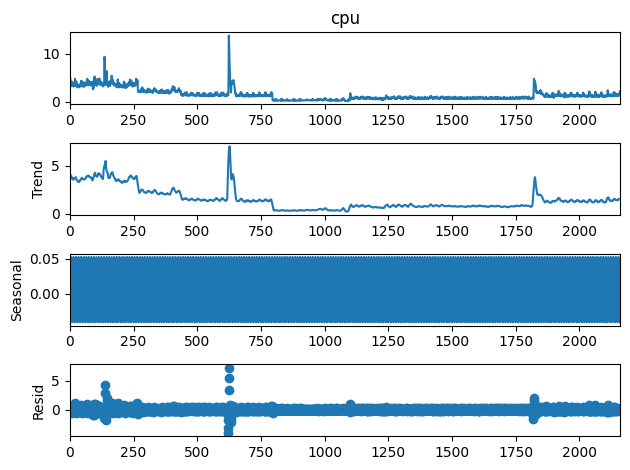

In [16]:
decompose = seasonal_decompose(df['cpu'], model='additive', period=10)
decompose.plot()
plt.show()

In [17]:
start_cpu = time.time()

In [18]:
##CPU
#creating a training dataset
train_cpu = pd.DataFrame(df[0:training_data_len]['timestamp'])
train_cpu['cpu'] = df[0:training_data_len]['cpu']
train_cpu.set_index('timestamp',inplace = True)

#creating the test base
test_cpu = pd.DataFrame(df[training_data_len+1:]['timestamp'])
test_cpu['cpu'] = df[training_data_len+1:]['cpu']
test_cpu.set_index('timestamp',inplace = True)

Text(0, 0.5, 'Value')

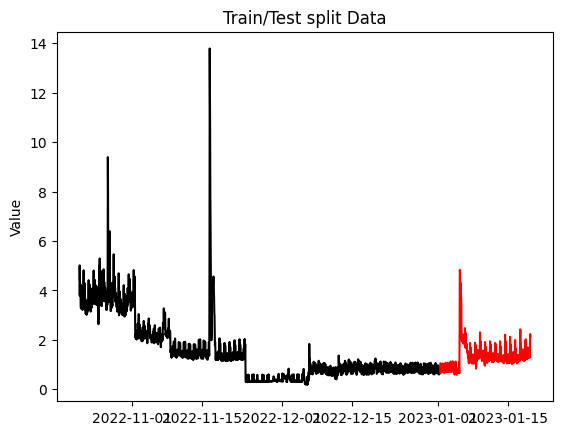

In [19]:
plt.plot(train_cpu, color = "black")
plt.plot(test_cpu, color = "red")
plt.title("Train/Test split Data")
plt.ylabel("Value")

In [20]:
model_cpu = auto_arima(train_cpu, 
                   start_P=1, 
                       start_q=1, 
                       max_p=3, 
                       max_q=3, 
                       m=5, 
                       sazonal=True, 
                       d=None, 
                       D=1, 
                       trace=True, 
                       error_action='ignore', 
                       suppress_warnings=True, 
                       stepwise=True)

model_cpu.fit(train_cpu)

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,1,1)[5] intercept   : AIC=inf, Time=11.74 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=3940.189, Time=0.38 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=2349.308, Time=2.74 sec
 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=2340.884, Time=3.40 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=3938.511, Time=0.12 sec
 ARIMA(0,0,1)(0,1,0)[5] intercept   : AIC=3062.653, Time=1.51 sec
 ARIMA(0,0,1)(1,1,1)[5] intercept   : AIC=2338.005, Time=6.04 sec
 ARIMA(0,0,1)(1,1,0)[5] intercept   : AIC=2649.716, Time=2.23 sec
 ARIMA(0,0,1)(2,1,1)[5] intercept   : AIC=2330.446, Time=12.16 sec
 ARIMA(0,0,1)(2,1,0)[5] intercept   : AIC=2485.345, Time=1.93 sec
 ARIMA(0,0,1)(2,1,2)[5] intercept   : AIC=2304.154, Time=10.53 sec
 ARIMA(0,0,1)(1,1,2)[5] intercept   : AIC=2318.349, Time=9.23 sec
 ARIMA(0,0,0)(2,1,2)[5] intercept   : AIC=3375.138, Time=8.02 sec
 ARIMA(1,0,1)(2,1,2)[5] intercept   : AIC=inf, Time=14.58 sec
 ARIMA(0,0,2)(2,1,2)[5] intercept   : A

ARIMA(order=(0, 0, 3), scoring_args={}, seasonal_order=(2, 1, 2, 5),
      suppress_warnings=True)

In [21]:
predictions_cpu = model_cpu.predict(n_periods = len(test_cpu))
predictions_cpu = pd.DataFrame(predictions_cpu, index = test_cpu.index, columns=['cpu'])
predictions_cpu = predictions_cpu.fillna(0)
predictions_cpu

,cpu
timestamp,
2023-01-01 13:00:00,0.746312
2023-01-01 14:00:00,0.676232
2023-01-01 15:00:00,0.643968
2023-01-01 16:00:00,0.695430
2023-01-01 17:00:00,0.691468
...,...
2023-01-19 08:00:00,-0.110345
2023-01-19 09:00:00,-0.088321
2023-01-19 10:00:00,-0.092692


In [22]:
end_cpu = time.time()

Text(0, 0.5, 'Value')

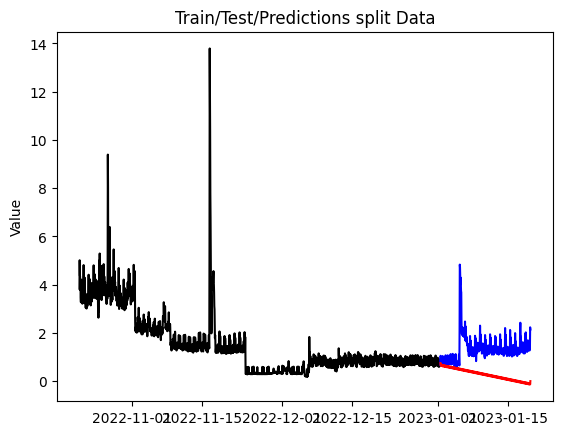

In [23]:
plt.plot(train_cpu, color = "black")
plt.plot(test_cpu, color = "blue")
plt.plot(predictions_cpu, color = "red")
plt.title("Train/Test/Predictions split Data")
plt.ylabel("Value")

In [24]:
print('Erro médio absoluto :', mean_absolute_error(test_cpu['cpu'], predictions_cpu['cpu']))
print('Erro médio quadrado :', mean_squared_error(test_cpu['cpu'], predictions_cpu['cpu']))
print('Coeficiente de determinação (R²):', r2_score(test_cpu['cpu'], predictions_cpu['cpu']))
print("Tempo de execução:", end_cpu-start_cpu)

Erro médio absoluto : 1.042695414303205
Erro médio quadrado : 1.4719332144225574
Coeficiente de determinação (R²): -4.005070420013134
Tempo de execução: 235.2454752922058


##Memory

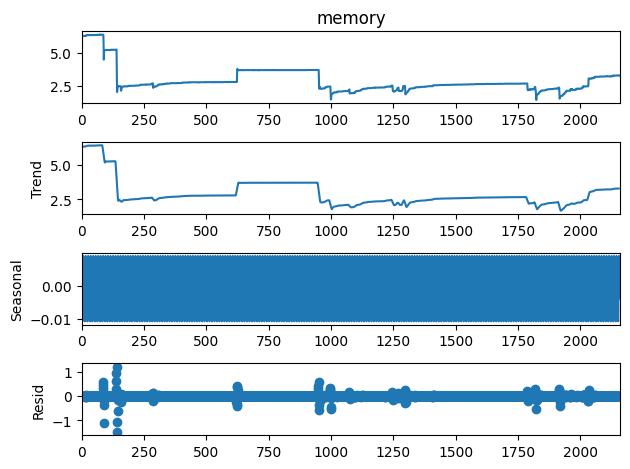

In [25]:
decompose = seasonal_decompose(df['memory'], model='additive', period=10)
decompose.plot()
plt.show()

In [26]:
start_memory = time.time()

In [27]:
##Memory
#creating a training dataset
train_memory = pd.DataFrame(df[0:training_data_len]['timestamp'])
train_memory['memory'] = df[0:training_data_len]['memory']
train_memory.set_index('timestamp',inplace = True)

#creating the test base
test_memory = pd.DataFrame(df[training_data_len+1:]['timestamp'])
test_memory['memory'] = df[training_data_len+1:]['memory']
test_memory.set_index('timestamp',inplace = True)

Text(0, 0.5, 'Value')

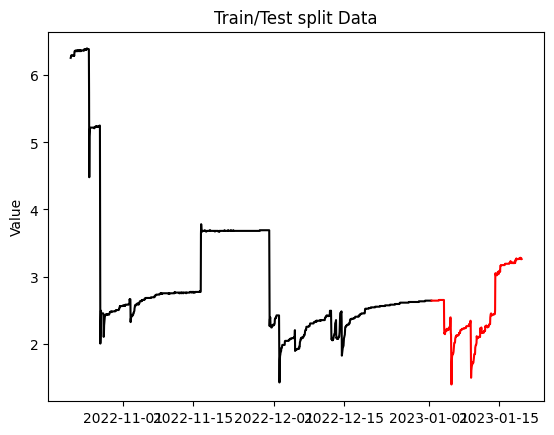

In [28]:
plt.plot(train_memory, color = "black")
plt.plot(test_memory, color = "red")
plt.title("Train/Test split Data")
plt.ylabel("Value")

In [29]:
model_memory = auto_arima(train_memory, 
                   start_P=1, 
                       start_q=1, 
                       max_p=3, 
                       max_q=3, 
                       m=5, 
                       sazonal=True, 
                       d=None, 
                       D=1, 
                       trace=True, 
                       error_action='ignore', 
                       suppress_warnings=True, 
                       stepwise=True)

model_memory.fit(train_memory)

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,1,1)[5] intercept   : AIC=-3836.443, Time=7.79 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=-595.705, Time=0.24 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=-3153.017, Time=2.21 sec
 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=-2157.456, Time=2.04 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=-593.056, Time=0.22 sec
 ARIMA(2,0,1)(0,1,1)[5] intercept   : AIC=inf, Time=7.43 sec
 ARIMA(2,0,1)(1,1,0)[5] intercept   : AIC=-3473.086, Time=4.20 sec
 ARIMA(2,0,1)(2,1,1)[5] intercept   : AIC=-3918.007, Time=13.58 sec
 ARIMA(2,0,1)(2,1,0)[5] intercept   : AIC=-3622.519, Time=11.91 sec
 ARIMA(2,0,1)(2,1,2)[5] intercept   : AIC=-3927.755, Time=14.29 sec
 ARIMA(2,0,1)(1,1,2)[5] intercept   : AIC=inf, Time=14.38 sec
 ARIMA(1,0,1)(2,1,2)[5] intercept   : AIC=inf, Time=13.46 sec
 ARIMA(2,0,0)(2,1,2)[5] intercept   : AIC=inf, Time=13.18 sec
 ARIMA(3,0,1)(2,1,2)[5] intercept   : AIC=inf, Time=20.17 sec
 ARIMA(2,0,2)(2,1,2)[5] intercept   : AIC=in

ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(2, 1, 2, 5),
      suppress_warnings=True)

In [30]:
predictions_memory = model_memory.predict(n_periods = len(test_memory))
predictions_memory = pd.DataFrame(predictions_memory, index = test_memory.index, columns=['memory'])
predictions_memory = predictions_memory.fillna(0)
predictions_memory

,memory
timestamp,
2023-01-01 13:00:00,2.628851
2023-01-01 14:00:00,2.623237
2023-01-01 15:00:00,2.617357
2023-01-01 16:00:00,2.611700
2023-01-01 17:00:00,2.606628
...,...
2023-01-19 08:00:00,1.725037
2023-01-19 09:00:00,1.723105
2023-01-19 10:00:00,1.721712


In [31]:
end_memory = time.time()

Text(0, 0.5, 'Value')

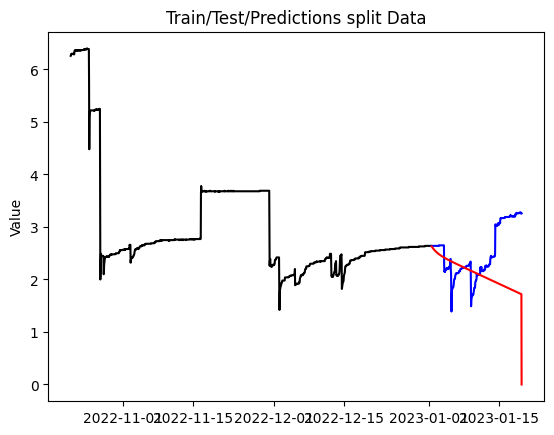

In [32]:
plt.plot(train_memory, color = "black")
plt.plot(test_memory, color = "blue")
plt.plot(predictions_memory, color = "red")
plt.title("Train/Test/Predictions split Data")
plt.ylabel("Value")

In [33]:
print('Erro médio absoluto :', mean_absolute_error(test_memory['memory'], predictions_memory['memory']))
print('Erro médio quadrado :', mean_squared_error(test_memory['memory'], predictions_memory['memory']))
print('Coeficiente de determinação (R²):', r2_score(test_memory['memory'], predictions_memory['memory']))
print("Tempo de execução:", end_memory-start_memory)

Erro médio absoluto : 0.5363882581179136
Erro médio quadrado : 0.6005561528004748
Coeficiente de determinação (R²): -1.611697847805909
Tempo de execução: 240.1414246559143


##Request

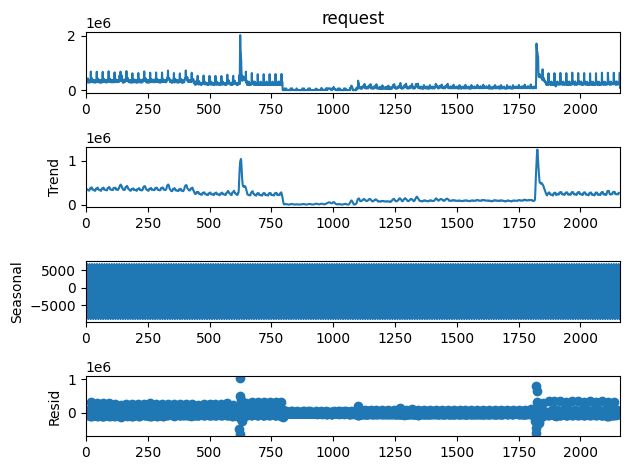

In [34]:
decompose = seasonal_decompose(df['request'], model='additive', period=10)
decompose.plot()
plt.show()

In [35]:
start_request = time.time()

In [36]:
##Request
#creating a training dataset
train_request = pd.DataFrame(df[0:training_data_len]['timestamp'])
train_request['request'] = df[0:training_data_len]['request']
train_request.set_index('timestamp',inplace = True)

#creating the test base
test_request = pd.DataFrame(df[training_data_len+1:]['timestamp'])
test_request['request'] = df[training_data_len+1:]['request']
test_request.set_index('timestamp',inplace = True)

Text(0, 0.5, 'Value')

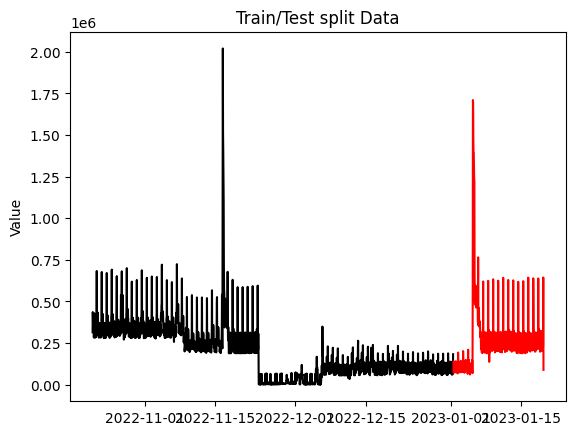

In [37]:
plt.plot(train_request, color = "black")
plt.plot(test_request, color = "red")
plt.title("Train/Test split Data")
plt.ylabel("Value")

In [39]:
model_request = auto_arima(train_request, 
                   start_P=1, 
                       start_q=1, 
                       max_p=3, 
                       max_q=3, 
                       m=5, 
                       sazonal=True, 
                       d=None, 
                       D=1, 
                       trace=True, 
                       error_action='ignore', 
                       suppress_warnings=True, 
                       stepwise=True)
model_request.fit(train_request)

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,1,1)[5] intercept   : AIC=inf, Time=5.22 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=45107.250, Time=0.16 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=44277.176, Time=1.55 sec
 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=44056.644, Time=1.48 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=45105.335, Time=0.09 sec
 ARIMA(0,0,1)(0,1,0)[5] intercept   : AIC=44615.398, Time=0.30 sec
 ARIMA(0,0,1)(1,1,1)[5] intercept   : AIC=44035.631, Time=1.39 sec
 ARIMA(0,0,1)(1,1,0)[5] intercept   : AIC=44369.622, Time=0.94 sec
 ARIMA(0,0,1)(2,1,1)[5] intercept   : AIC=44036.082, Time=2.46 sec
 ARIMA(0,0,1)(1,1,2)[5] intercept   : AIC=44035.876, Time=3.32 sec
 ARIMA(0,0,1)(0,1,2)[5] intercept   : AIC=44034.048, Time=3.51 sec
 ARIMA(0,0,0)(0,1,2)[5] intercept   : AIC=44594.857, Time=2.87 sec
 ARIMA(1,0,1)(0,1,2)[5] intercept   : AIC=inf, Time=2.94 sec
 ARIMA(0,0,2)(0,1,2)[5] intercept   : AIC=43959.558, Time=2.32 sec
 ARIMA(0,0,2)(0,1,1)[5] interce

ARIMA(order=(0, 0, 3), scoring_args={}, seasonal_order=(2, 1, 1, 5),
      suppress_warnings=True, with_intercept=False)

In [40]:
predictions_request = model_request.predict(n_periods = len(test_request))
predictions_request = pd.DataFrame(predictions_request, index = test_request.index, columns=['request'])
predictions_request = predictions_request.fillna(0)
predictions_request

,request
timestamp,
2023-01-01 13:00:00,112147.127661
2023-01-01 14:00:00,100609.442406
2023-01-01 15:00:00,89585.329565
2023-01-01 16:00:00,106328.570655
2023-01-01 17:00:00,104515.894289
...,...
2023-01-19 08:00:00,88918.828902
2023-01-19 09:00:00,97557.170158
2023-01-19 10:00:00,97574.498002


In [41]:
end_request = time.time()

Text(0, 0.5, 'Value')

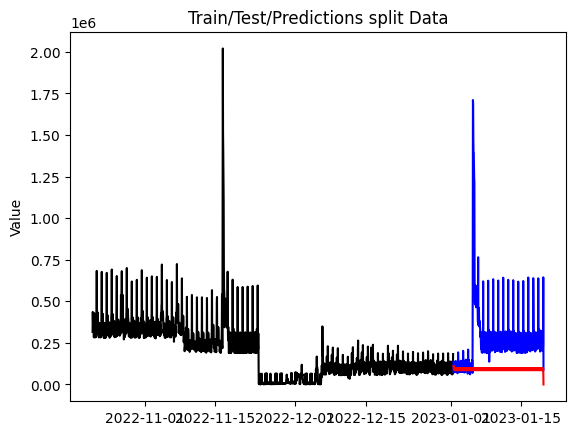

In [42]:
plt.plot(train_request, color = "black")
plt.plot(test_request, color = "blue")
plt.plot(predictions_request, color = "red")
plt.title("Train/Test/Predictions split Data")
plt.ylabel("Value")

In [43]:
print('Erro médio absoluto :', mean_absolute_error(test_request['request'], predictions_request['request']))
print('Erro médio quadrado :', mean_squared_error(test_request['request'], predictions_request['request']))
print('Coeficiente de determinação (R²):', r2_score(test_request['request'], predictions_request['request']))
print("Tempo de execução:", end_request-start_request)

Erro médio absoluto : 168030.1472228102
Erro médio quadrado : 67811351094.0602
Coeficiente de determinação (R²): -0.6652241704606032
Tempo de execução: 281.73260712623596


##Latency

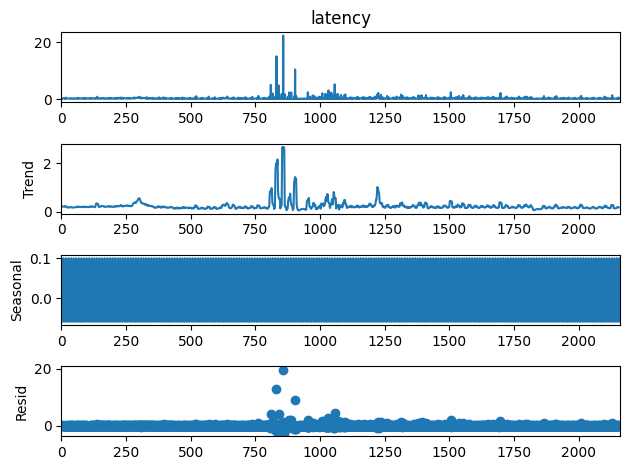

In [44]:
decompose = seasonal_decompose(df['latency'], model='additive', period=10)
decompose.plot()
plt.show()

In [45]:
start_latency = time.time()

In [46]:
##Latency
#creating a training dataset
train_latency = pd.DataFrame(df[0:training_data_len]['timestamp'])
train_latency['latency'] = df[0:training_data_len]['latency']
train_latency.set_index('timestamp',inplace = True)

#creating the test base
test_latency = pd.DataFrame(df[training_data_len+1:]['timestamp'])
test_latency['latency'] = df[training_data_len+1:]['latency']
test_latency.set_index('timestamp',inplace = True)

Text(0, 0.5, 'Value')

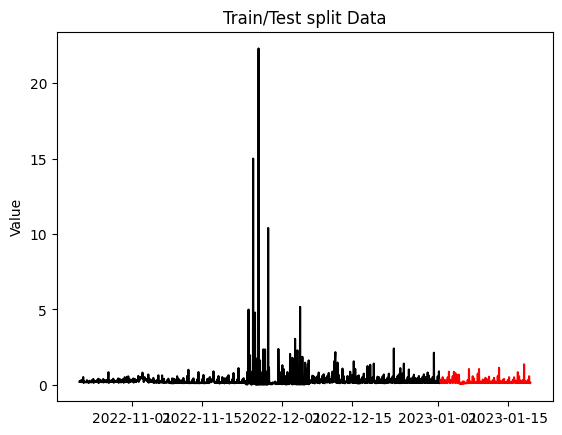

In [47]:
plt.plot(train_latency, color = "black")
plt.plot(test_latency, color = "red")
plt.title("Train/Test split Data")
plt.ylabel("Value")

In [48]:
model_latency = auto_arima(train_latency, 
                   start_P=1, 
                       start_q=1, 
                       max_p=3, 
                       max_q=3, 
                       m=5, 
                       sazonal=True, 
                       d=None, 
                       D=1, 
                       trace=True, 
                       error_action='ignore', 
                       suppress_warnings=True, 
                       stepwise=True)
model_latency.fit(train_latency)

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,1,1)[5] intercept   : AIC=inf, Time=8.70 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=5166.399, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=4702.431, Time=0.92 sec
 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=inf, Time=4.49 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=5164.399, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[5] intercept   : AIC=5168.045, Time=0.17 sec
 ARIMA(1,0,0)(2,1,0)[5] intercept   : AIC=4463.847, Time=2.22 sec
 ARIMA(1,0,0)(2,1,1)[5] intercept   : AIC=inf, Time=8.69 sec
 ARIMA(1,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=7.35 sec
 ARIMA(0,0,0)(2,1,0)[5] intercept   : AIC=4464.522, Time=1.42 sec
 ARIMA(2,0,0)(2,1,0)[5] intercept   : AIC=4465.609, Time=2.22 sec
 ARIMA(1,0,1)(2,1,0)[5] intercept   : AIC=4465.737, Time=4.15 sec
 ARIMA(0,0,1)(2,1,0)[5] intercept   : AIC=4463.917, Time=1.72 sec
 ARIMA(2,0,1)(2,1,0)[5] intercept   : AIC=4448.499, Time=11.96 sec
 ARIMA(2,0,1)(1,1,0)[5] intercept   : AIC=4696.420, 

ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(2, 1, 0, 5),
      suppress_warnings=True, with_intercept=False)

In [49]:
predictions_latency = model_latency.predict(n_periods = len(test_latency))
predictions_latency = pd.DataFrame(predictions_latency, index = test_latency.index, columns=['latency'])
predictions_latency = predictions_latency.fillna(0)
predictions_latency

,latency
timestamp,
2023-01-01 13:00:00,0.114333
2023-01-01 14:00:00,0.206329
2023-01-01 15:00:00,0.284691
2023-01-01 16:00:00,0.392918
2023-01-01 17:00:00,0.115460
...,...
2023-01-19 08:00:00,0.247686
2023-01-19 09:00:00,0.386066
2023-01-19 10:00:00,0.162568


In [50]:
end_latency = time.time()

Text(0, 0.5, 'Value')

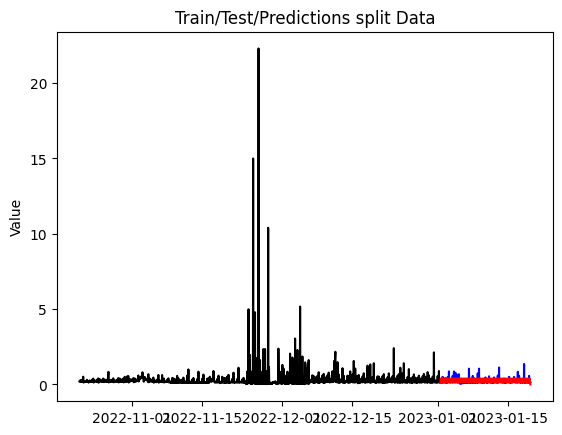

In [51]:
plt.plot(train_latency, color = "black")
plt.plot(test_latency, color = "blue")
plt.plot(predictions_latency, color = "red")
plt.title("Train/Test/Predictions split Data")
plt.ylabel("Value")

In [52]:
print('Erro médio absoluto :', mean_absolute_error(test_latency['latency'], predictions_latency['latency']))
print('Erro médio quadrado :', mean_squared_error(test_latency['latency'], predictions_latency['latency']))
print('Coeficiente de determinação (R²):', r2_score(test_latency['latency'], predictions_latency['latency']))
print("Tempo de execução:", end_latency-start_latency)

Erro médio absoluto : 0.10939801469799139
Erro médio quadrado : 0.031168491126500227
Coeficiente de determinação (R²): -0.5021185850279675
Tempo de execução: 154.8950276374817
